In [ ]:
!pip install scipy


In [1]:
from rdkit.Chem import PandasTools
import matplotlib.pyplot as plt

import os
from rdkit import RDConfig
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import pandas as pd, numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
df = pd.read_csv('ligand_gpcr_tot_int.csv')
df.head()

,Unnamed: 0,UniProt ID,InChI Key,Parameter,Value,Unit,Database Source,Database Target ID,Database Ligand ID,Reference,...,Canonical SMILES,Isomeric SMILES,InChI Std. ID,XlogP,Hydrogen Bond Donors,Hydrogen Bond Acceptors,GPCR Name,Gene Name,Species,FASTA Sequence
0,3,O95136,XWGOCGLJLLJAOE-UHFFFAOYSA-N,IC50,3.7,nM,ChEMBL,CHEMBL2955,CHEMBL3401383,25746814,...,CCC(CC)CC1(CCN(CC1)C(=O)NC2=CC(=CC(=C2)OC3=CC=...,CCC(CC)CC1(CCN(CC1)C(=O)NC2=CC(=CC(=C2)OC3=CC=...,InChI=1S/C31H36FN3O5/c1-3-21(4-2)20-31(38)13-1...,5.6,3.0,6.0,Sphingosine 1-phosphate receptor 2,S1PR2,Homo sapiens (Human),MGSLYSEYLNPNKVQEHYNYTKETLETQETTSRQVASAFIVILCCA...
1,7,O95136,XWGOCGLJLLJAOE-UHFFFAOYSA-N,IC50,3.7,nM,ChEMBL,CHEMBL2955,CHEMBL3401383,26384288,...,CCC(CC)CC1(CCN(CC1)C(=O)NC2=CC(=CC(=C2)OC3=CC=...,CCC(CC)CC1(CCN(CC1)C(=O)NC2=CC(=CC(=C2)OC3=CC=...,InChI=1S/C31H36FN3O5/c1-3-21(4-2)20-31(38)13-1...,5.6,3.0,6.0,Sphingosine 1-phosphate receptor 2,S1PR2,Homo sapiens (Human),MGSLYSEYLNPNKVQEHYNYTKETLETQETTSRQVASAFIVILCCA...
2,8,O95136,XWGOCGLJLLJAOE-UHFFFAOYSA-N,IC50,39,nM,ChEMBL,CHEMBL2955,CHEMBL3401383,26384288,...,CCC(CC)CC1(CCN(CC1)C(=O)NC2=CC(=CC(=C2)OC3=CC=...,CCC(CC)CC1(CCN(CC1)C(=O)NC2=CC(=CC(=C2)OC3=CC=...,InChI=1S/C31H36FN3O5/c1-3-21(4-2)20-31(38)13-1...,5.6,3.0,6.0,Sphingosine 1-phosphate receptor 2,S1PR2,Homo sapiens (Human),MGSLYSEYLNPNKVQEHYNYTKETLETQETTSRQVASAFIVILCCA...
3,10,O95136,XWGOCGLJLLJAOE-UHFFFAOYSA-N,IC50,39,nM,ChEMBL,CHEMBL2955,CHEMBL3401383,25746814,...,CCC(CC)CC1(CCN(CC1)C(=O)NC2=CC(=CC(=C2)OC3=CC=...,CCC(CC)CC1(CCN(CC1)C(=O)NC2=CC(=CC(=C2)OC3=CC=...,InChI=1S/C31H36FN3O5/c1-3-21(4-2)20-31(38)13-1...,5.6,3.0,6.0,Sphingosine 1-phosphate receptor 2,S1PR2,Homo sapiens (Human),MGSLYSEYLNPNKVQEHYNYTKETLETQETTSRQVASAFIVILCCA...
4,14,O95136,ODAGRTXRMUHDND-UHFFFAOYSA-N,EC50,>100000,nM,ChEMBL,CHEMBL2955,CHEMBL2048287,22633692,...,C1CC2=C(C1CC(=O)O)NC3=C2C=C(C=C3)C4=NOC(=N4)C5...,C1CC2=C(C1CC(=O)O)NC3=C2C=C(C=C3)C4=NOC(=N4)C5...,"InChI=1S/C23H15F3N4O4/c24-23(25,26)33-15-6-11(...",4.5,2.0,10.0,Sphingosine 1-phosphate receptor 2,S1PR2,Homo sapiens (Human),MGSLYSEYLNPNKVQEHYNYTKETLETQETTSRQVASAFIVILCCA...


,Unnamed: 0,UniProt ID,InChI Key,Parameter,Value,Unit,Database Source,Database Target ID,Database Ligand ID,Reference,...,Isomeric SMILES,InChI Std. ID,XlogP,Hydrogen Bond Donors,Hydrogen Bond Acceptors,GPCR Name,Gene Name,Species,FASTA Sequence,Molecule
0,24,P41146,CDYNZSOUMBLDST-UHFFFAOYSA-N,Ki,3,nM,ChEMBL,CHEMBL2014,CHEMBL391486,17166723,...,CC1=C(C=C(C=C1)OC)OC(CCN2CCC(CC2)N3C4=CC=CC=C4...,InChI=1S/C28H38N4O4/c1-19(2)25(36-26-17-22(35-...,4.2,1.0,5.0,Nociceptin receptor,OPRL1,Homo sapiens (Human),MEPLFPAPFWEVIYGSHLQGNLSLLSPNHSLLPPHLLLNASHGAFL...,
1,26,P41146,CDYNZSOUMBLDST-UHFFFAOYSA-N,IC50,32,nM,ChEMBL,CHEMBL2014,CHEMBL391486,17166723,...,CC1=C(C=C(C=C1)OC)OC(CCN2CCC(CC2)N3C4=CC=CC=C4...,InChI=1S/C28H38N4O4/c1-19(2)25(36-26-17-22(35-...,4.2,1.0,5.0,Nociceptin receptor,OPRL1,Homo sapiens (Human),MEPLFPAPFWEVIYGSHLQGNLSLLSPNHSLLPPHLLLNASHGAFL...,
2,29,P41146,PFIFPQFMXOXEOF-UHFFFAOYSA-N,Ki,82.4,nM,ChEMBL,CHEMBL2014,CHEMBL422641,11101358,...,CC1=NC2=C(C=C(C=C2)NC(=O)C3=CC=CC=C3COC4=CC=C(...,InChI=1S/C24H22N4O2/c1-15-12-22(26)21-13-18(8-...,3.5,3.0,5.0,Nociceptin receptor,OPRL1,Homo sapiens (Human),MEPLFPAPFWEVIYGSHLQGNLSLLSPNHSLLPPHLLLNASHGAFL...,
3,41,P41146,ISINYRHGAOAMGJ-PBHICJAKSA-N,IC50,12,nM,ChEMBL,CHEMBL2014,CHEMBL557925,19564110,...,CC1=C(N(N=C1CN[C@H]2CC[C@H](C2)F)CC(=O)C)C3=CC...,InChI=1S/C19H22F3N3O/c1-11(26)10-25-19(13-5-15...,3.0,1.0,6.0,Nociceptin receptor,OPRL1,Homo sapiens (Human),MEPLFPAPFWEVIYGSHLQGNLSLLSPNHSLLPPHLLLNASHGAFL...,
4,48,P41146,HYIZZMKORUTBGZ-UHFFFAOYSA-N,Ki,155,nM,ChEMBL,CHEMBL2014,CHEMBL399393,17166723,...,CC1=C(C=C(C=C1)OC)OC(CCN2CCC(CC2)N3C4=CC=CC=C4...,InChI=1S/C32H46N4O4/c1-22(2)28(40-29-20-25(39-...,5.6,1.0,5.0,Nociceptin receptor,OPRL1,Homo sapiens (Human),MEPLFPAPFWEVIYGSHLQGNLSLLSPNHSLLPPHLLLNASHGAFL...,

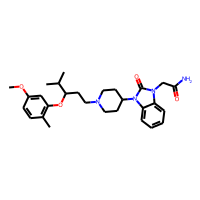
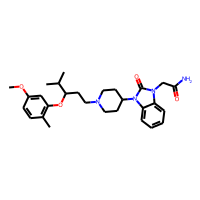
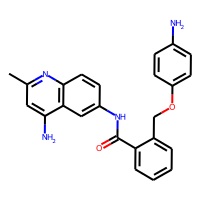
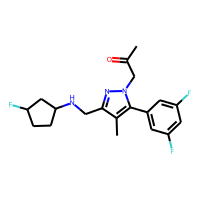
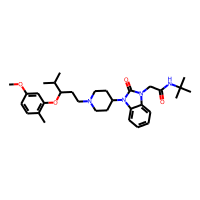

In [2]:
def csv2mol(filename):
    

    #filename = "sample_input.csv"

    df = pd.read_csv(filename)
    df = df.dropna()
    PandasTools.AddMoleculeColumnToFrame(df, 'Canonical SMILES','Molecule', includeFingerprints=True)
    return df
#df = pd.DataFrame("sample_input.csv")
gpcr = csv2mol("ligand_gpcr_active_data.csv")
gpcr.head()


In [3]:
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import QED
import numpy as np

def getMolObj(df, rep): #needs data frame and molecular representation
    PandasTools.AddMoleculeColumnToFrame(df, rep, includeFingerprints = True)
    return df



def descriptor_list(a):

    desc_list = [
            list(map(QED.default,a)),
            list(map(rdMolDescriptors.CalcTPSA, a)),
            list(map(rdMolDescriptors.CalcNumAliphaticCarbocycles,a )),
            list(map(rdMolDescriptors.CalcNumAliphaticHeterocycles, a)),
            list(map(rdMolDescriptors.CalcNumAliphaticRings, a)),
            list(map(rdMolDescriptors.CalcNumAmideBonds, a)),
            list(map(rdMolDescriptors.CalcNumAromaticCarbocycles, a)),
            list(map(rdMolDescriptors.CalcNumAromaticHeterocycles, a)),
            list(map(rdMolDescriptors.CalcNumAtomStereoCenters, a)),
            list(map(rdMolDescriptors.CalcNumAromaticRings, a)),
            list(map(rdMolDescriptors.CalcExactMolWt, a)),
            list(map(rdMolDescriptors.CalcNumHBA, a)),
            list(map(rdMolDescriptors.CalcNumHBD, a)),
            list(map(rdMolDescriptors.CalcNumLipinskiHBA, a)),
                ]
   
    return desc_list

def rotated(array_2d):
    list_of_tuples = zip(*reversed(array_2d[::-1]))
    return [list(elem) for elem in list_of_tuples]



def rdkDescribe(df):
    #get molobjects
    mols = df['Molecule']
    #pull the index
    ind = df.index
    #blank df for rdkit features
    rdk_df = pd.DataFrame(columns=['QED', 'TPSA', 'NumAliphaticCarbocycles',
                                      'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAmideBonds',
                                      'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAtomStereoCenters', 'NumAromaticRings',
                                      'ExactMolWt', 'NumHBA', 'NumHBD', 'NumLipinskiHBA'])
    #Calculate descriptors
    desc = descriptor_list(mols)
   
    #rotate
    rotated_desc = np.array(list(rotated(desc)))
   
    #add descriptors to dataframe
    rdk_df = rdk_df.append(pd.DataFrame(rotated_desc, columns = rdk_df.columns))
   
    #add index to descriptor data frame
    rdk_df['Molecule'] = ind
    rdk_df =rdk_df.set_index('Molecule')
   
    #merge data frames
    df2 = pd.concat([df, rdk_df], axis = 1)

    return df2





#all_df = getMolObj(lipo, 'smiles')
all_df = rdkDescribe(gpcr)

all_df.head(5)

,Unnamed: 0,UniProt ID,InChI Key,Parameter,Value,Unit,Database Source,Database Target ID,Database Ligand ID,Reference,...,NumAliphaticRings,NumAmideBonds,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAtomStereoCenters,NumAromaticRings,ExactMolWt,NumHBA,NumHBD,NumLipinskiHBA
0,24,P41146,CDYNZSOUMBLDST-UHFFFAOYSA-N,Ki,3,nM,ChEMBL,CHEMBL2014,CHEMBL391486,17166723,...,1.0,1.0,2.0,1.0,1.0,3.0,494.289306,7.0,1.0,8.0
1,26,P41146,CDYNZSOUMBLDST-UHFFFAOYSA-N,IC50,32,nM,ChEMBL,CHEMBL2014,CHEMBL391486,17166723,...,1.0,1.0,2.0,1.0,1.0,3.0,494.289306,7.0,1.0,8.0
2,29,P41146,PFIFPQFMXOXEOF-UHFFFAOYSA-N,Ki,82.4,nM,ChEMBL,CHEMBL2014,CHEMBL422641,11101358,...,0.0,1.0,3.0,1.0,0.0,4.0,398.174276,5.0,3.0,6.0
3,41,P41146,ISINYRHGAOAMGJ-PBHICJAKSA-N,IC50,12,nM,ChEMBL,CHEMBL2014,CHEMBL557925,19564110,...,1.0,0.0,1.0,1.0,2.0,2.0,365.171497,4.0,1.0,4.0
4,48,P41146,HYIZZMKORUTBGZ-UHFFFAOYSA-N,Ki,155,nM,ChEMBL,CHEMBL2014,CHEMBL399393,17166723,...,1.0,1.0,2.0,1.0,1.0,3.0,550.351906,7.0,1.0,8.0


In [4]:
list(all_df .keys())


['Unnamed: 0',
 'UniProt ID',
 'InChI Key',
 'Parameter',
 'Value',
 'Unit',
 'Database Source',
 'Database Target ID',
 'Database Ligand ID',
 'Reference',
 'Ligand Name',
 'CID',
 'Molecular Formula',
 'Molecular Weight',
 'IUPAC Name',
 'Canonical SMILES',
 'Isomeric SMILES',
 'InChI Std. ID',
 'XlogP',
 'Hydrogen Bond Donors',
 'Hydrogen Bond Acceptors',
 'GPCR Name',
 'Gene Name',
 'Species',
 'FASTA Sequence',
 'Molecule',
 'QED',
 'TPSA',
 'NumAliphaticCarbocycles',
 'NumAliphaticHeterocycles',
 'NumAliphaticRings',
 'NumAmideBonds',
 'NumAromaticCarbocycles',
 'NumAromaticHeterocycles',
 'NumAtomStereoCenters',
 'NumAromaticRings',
 'ExactMolWt',
 'NumHBA',
 'NumHBD',
 'NumLipinskiHBA']

In [5]:
all_df = all_df.drop(['Unnamed: 0'],axis=1)
all_df = all_df.drop(['Isomeric SMILES'], axis=1)
all_df = all_df.drop(['InChI Key'], axis=1)
all_df = all_df.drop(['Unit'], axis=1)
all_df = all_df.drop(['FASTA Sequence'], axis=1)
all_df = all_df.drop(['Database Source'], axis=1)
all_df = all_df.drop(['InChI Std. ID'], axis=1)
all_df = all_df.drop(['IUPAC Name'], axis=1)
#all_df = all_df.drop(['UniProt ID'], axis=1)


all_df

,UniProt ID,Parameter,Value,Database Target ID,Database Ligand ID,Reference,Ligand Name,CID,Molecular Formula,Molecular Weight,...,NumAliphaticRings,NumAmideBonds,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAtomStereoCenters,NumAromaticRings,ExactMolWt,NumHBA,NumHBD,NumLipinskiHBA
0,P41146,Ki,3,CHEMBL2014,CHEMBL391486,17166723,CHEMBL391486,44437606.0,C28H38N4O4,494.636,...,1.0,1.0,2.0,1.0,1.0,3.0,494.289306,7.0,1.0,8.0
1,P41146,IC50,32,CHEMBL2014,CHEMBL391486,17166723,CHEMBL391486,44437606.0,C28H38N4O4,494.636,...,1.0,1.0,2.0,1.0,1.0,3.0,494.289306,7.0,1.0,8.0
2,P41146,Ki,82.4,CHEMBL2014,CHEMBL422641,11101358,CHEMBL422641,9824268.0,C24H22N4O2,398.466,...,0.0,1.0,3.0,1.0,0.0,4.0,398.174276,5.0,3.0,6.0
3,P41146,IC50,12,CHEMBL2014,CHEMBL557925,19564110,CHEMBL557925,45273547.0,C19H22F3N3O,365.400,...,1.0,0.0,1.0,1.0,2.0,2.0,365.171497,4.0,1.0,4.0
4,P41146,Ki,155,CHEMBL2014,CHEMBL399393,17166723,CHEMBL399393,44437643.0,C32H46N4O4,550.744,...,1.0,1.0,2.0,1.0,1.0,3.0,550.351906,7.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92475,F8VQN3,EC50,0.28,98,3404,21712392,12(S)-HETE,5283155.0,C20H32O3,320.473,...,0.0,0.0,0.0,0.0,1.0,0.0,320.235145,2.0,2.0,3.0
92476,P12526,EC50,170 - 1710,150,7039,22003054,AR234960,89560738.0,C27H30FN5O5S,555.625,...,2.0,0.0,2.0,1.0,2.0,3.0,555.195168,8.0,0.0,10.0
92477,P04201,EC50,350 - 720,150,7039,22003054,AR234960,89560738.0,C27H30FN5O5S,555.625,...,2.0,0.0,2.0,1.0,2.0,3.0,555.195168,8.0,0.0,10.0
92478,Q5QD16,EC50,10000,168,5506,16878137,ISOAMYLAMINE,7894.0,C5H13N,87.166,...,0.0,0.0,0.0,0.0,0.0,0.0,87.104799,1.0,1.0,1.0


In [6]:

list(all_df .keys())

['UniProt ID',
 'Parameter',
 'Value',
 'Database Target ID',
 'Database Ligand ID',
 'Reference',
 'Ligand Name',
 'CID',
 'Molecular Formula',
 'Molecular Weight',
 'Canonical SMILES',
 'XlogP',
 'Hydrogen Bond Donors',
 'Hydrogen Bond Acceptors',
 'GPCR Name',
 'Gene Name',
 'Species',
 'Molecule',
 'QED',
 'TPSA',
 'NumAliphaticCarbocycles',
 'NumAliphaticHeterocycles',
 'NumAliphaticRings',
 'NumAmideBonds',
 'NumAromaticCarbocycles',
 'NumAromaticHeterocycles',
 'NumAtomStereoCenters',
 'NumAromaticRings',
 'ExactMolWt',
 'NumHBA',
 'NumHBD',
 'NumLipinskiHBA']

In [7]:
all_df = all_df.drop(['UniProt ID'],axis=1)
all_df = all_df.drop(['Reference'], axis=1)
all_df = all_df.drop(['CID'], axis=1)
all_df = all_df.drop(['Database Target ID'], axis=1)
all_df = all_df.drop(['Database Ligand ID'], axis=1)
all_df

,Parameter,Value,Ligand Name,Molecular Formula,Molecular Weight,Canonical SMILES,XlogP,Hydrogen Bond Donors,Hydrogen Bond Acceptors,GPCR Name,...,NumAliphaticRings,NumAmideBonds,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAtomStereoCenters,NumAromaticRings,ExactMolWt,NumHBA,NumHBD,NumLipinskiHBA
0,Ki,3,CHEMBL391486,C28H38N4O4,494.636,CC1=C(C=C(C=C1)OC)OC(CCN2CCC(CC2)N3C4=CC=CC=C4...,4.2,1.0,5.0,Nociceptin receptor,...,1.0,1.0,2.0,1.0,1.0,3.0,494.289306,7.0,1.0,8.0
1,IC50,32,CHEMBL391486,C28H38N4O4,494.636,CC1=C(C=C(C=C1)OC)OC(CCN2CCC(CC2)N3C4=CC=CC=C4...,4.2,1.0,5.0,Nociceptin receptor,...,1.0,1.0,2.0,1.0,1.0,3.0,494.289306,7.0,1.0,8.0
2,Ki,82.4,CHEMBL422641,C24H22N4O2,398.466,CC1=NC2=C(C=C(C=C2)NC(=O)C3=CC=CC=C3COC4=CC=C(...,3.5,3.0,5.0,Nociceptin receptor,...,0.0,1.0,3.0,1.0,0.0,4.0,398.174276,5.0,3.0,6.0
3,IC50,12,CHEMBL557925,C19H22F3N3O,365.400,CC1=C(N(N=C1CNC2CCC(C2)F)CC(=O)C)C3=CC(=CC(=C3...,3.0,1.0,6.0,Nociceptin receptor,...,1.0,0.0,1.0,1.0,2.0,2.0,365.171497,4.0,1.0,4.0
4,Ki,155,CHEMBL399393,C32H46N4O4,550.744,CC1=C(C=C(C=C1)OC)OC(CCN2CCC(CC2)N3C4=CC=CC=C4...,5.6,1.0,5.0,Nociceptin receptor,...,1.0,1.0,2.0,1.0,1.0,3.0,550.351906,7.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92475,EC50,0.28,12(S)-HETE,C20H32O3,320.473,CCCCCC=CCC(C=CC=CCC=CCCCC(=O)O)O,5.2,2.0,3.0,"12-(S)-hydroxy-5,8,10,14-eicosatetraenoic acid...",...,0.0,0.0,0.0,0.0,1.0,0.0,320.235145,2.0,2.0,3.0
92476,EC50,170 - 1710,AR234960,C27H30FN5O5S,555.625,COC1=C(C=CC(=C1)[N+](=O)[O-])S(=O)(=O)N2CC(C(C...,3.6,0.0,10.0,Proto-oncogene Mas,...,2.0,0.0,2.0,1.0,2.0,3.0,555.195168,8.0,0.0,10.0
92477,EC50,350 - 720,AR234960,C27H30FN5O5S,555.625,COC1=C(C=CC(=C1)[N+](=O)[O-])S(=O)(=O)N2CC(C(C...,3.6,0.0,10.0,Proto-oncogene Mas,...,2.0,0.0,2.0,1.0,2.0,3.0,555.195168,8.0,0.0,10.0
92478,EC50,10000,ISOAMYLAMINE,C5H13N,87.166,CC(C)CCN,1.0,1.0,1.0,Trace amine-associated receptor 3,...,0.0,0.0,0.0,0.0,0.0,0.0,87.104799,1.0,1.0,1.0


In [8]:
all_df = all_df.drop(['Canonical SMILES'],axis=1)
list(all_df .keys())


['Parameter',
 'Value',
 'Ligand Name',
 'Molecular Formula',
 'Molecular Weight',
 'XlogP',
 'Hydrogen Bond Donors',
 'Hydrogen Bond Acceptors',
 'GPCR Name',
 'Gene Name',
 'Species',
 'Molecule',
 'QED',
 'TPSA',
 'NumAliphaticCarbocycles',
 'NumAliphaticHeterocycles',
 'NumAliphaticRings',
 'NumAmideBonds',
 'NumAromaticCarbocycles',
 'NumAromaticHeterocycles',
 'NumAtomStereoCenters',
 'NumAromaticRings',
 'ExactMolWt',
 'NumHBA',
 'NumHBD',
 'NumLipinskiHBA']

,GPCR Name,Ligand Name,Molecule,Parameter,Value,Molecular Formula,Molecular Weight,XlogP,Hydrogen Bond Donors,Hydrogen Bond Acceptors,...,NumAliphaticRings,NumAmideBonds,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAtomStereoCenters,NumAromaticRings,ExactMolWt,NumHBA,NumHBD,NumLipinskiHBA
0,Nociceptin receptor,CHEMBL391486,,Ki,3,C28H38N4O4,494.636,4.2,1.0,5.0,...,1.0,1.0,2.0,1.0,1.0,3.0,494.289306,7.0,1.0,8.0
1,Nociceptin receptor,CHEMBL391486,,IC50,32,C28H38N4O4,494.636,4.2,1.0,5.0,...,1.0,1.0,2.0,1.0,1.0,3.0,494.289306,7.0,1.0,8.0
2,Nociceptin receptor,CHEMBL422641,,Ki,82.4,C24H22N4O2,398.466,3.5,3.0,5.0,...,0.0,1.0,3.0,1.0,0.0,4.0,398.174276,5.0,3.0,6.0
3,Nociceptin receptor,CHEMBL557925,,IC50,12,C19H22F3N3O,365.400,3.0,1.0,6.0,...,1.0,0.0,1.0,1.0,2.0,2.0,365.171497,4.0,1.0,4.0
4,Nociceptin receptor,CHEMBL399393,,Ki,155,C32H46N4O4,550.744,5.6,1.0,5.0,...,1.0,1.0,2.0,1.0,1.0,3.0,550.351906,7.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92475,"12-(S)-hydroxy-5,8,10,14-eicosatetraenoic acid...",12(S)-HETE,,EC50,0.28,C20H32O3,320.473,5.2,2.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,320.235145,2.0,2.0,3.0
92476,Proto-oncogene Mas,AR234960,,EC50,170 - 1710,C27H30FN5O5S,555.625,3.6,0.0,10.0,...,2.0,0.0,2.0,1.0,2.0,3.0,555.195168,8.0,0.0,10.0
92477,Proto-oncogene Mas,AR234960,,EC50,350 - 720,C27H30FN5O5S,555.625,3.6,0.0,10.0,...,2.0,0.0,2.0,1.0,2.0,3.0,555.195168,8.0,0.0,10.0
92478,Trace amine-associated receptor 3,ISOAMYLAMINE,,EC50,10000,C5H13N,87.166,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,87.104799,1.0,1.0,1.0

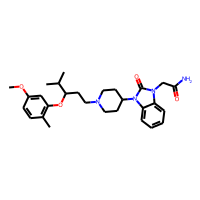
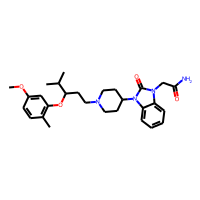
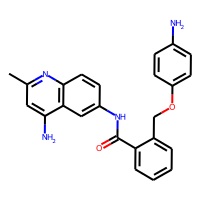
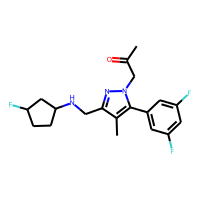
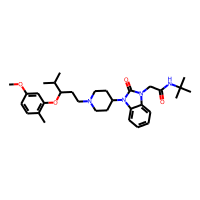
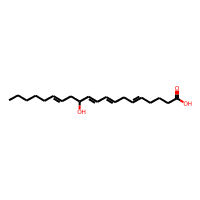
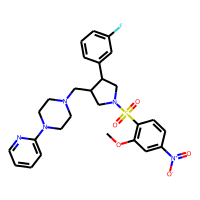
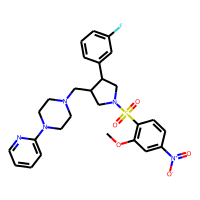
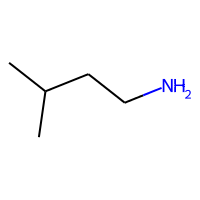
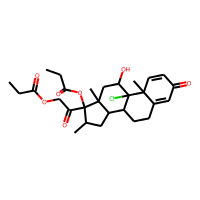

In [9]:



gpcr = all_df['GPCR Name']
ligand = all_df['Ligand Name']
mol = all_df['Molecule']

all_df = all_df.drop(columns=['GPCR Name'])
all_df.insert(loc=0, column='GPCR Name', value=gpcr)

all_df = all_df.drop(columns=['Ligand Name'])
all_df.insert(loc=1, column='Ligand Name', value=ligand)

all_df = all_df.drop(columns=['Molecule'])
all_df.insert(loc=2, column='Molecule', value=mol)


all_df

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns



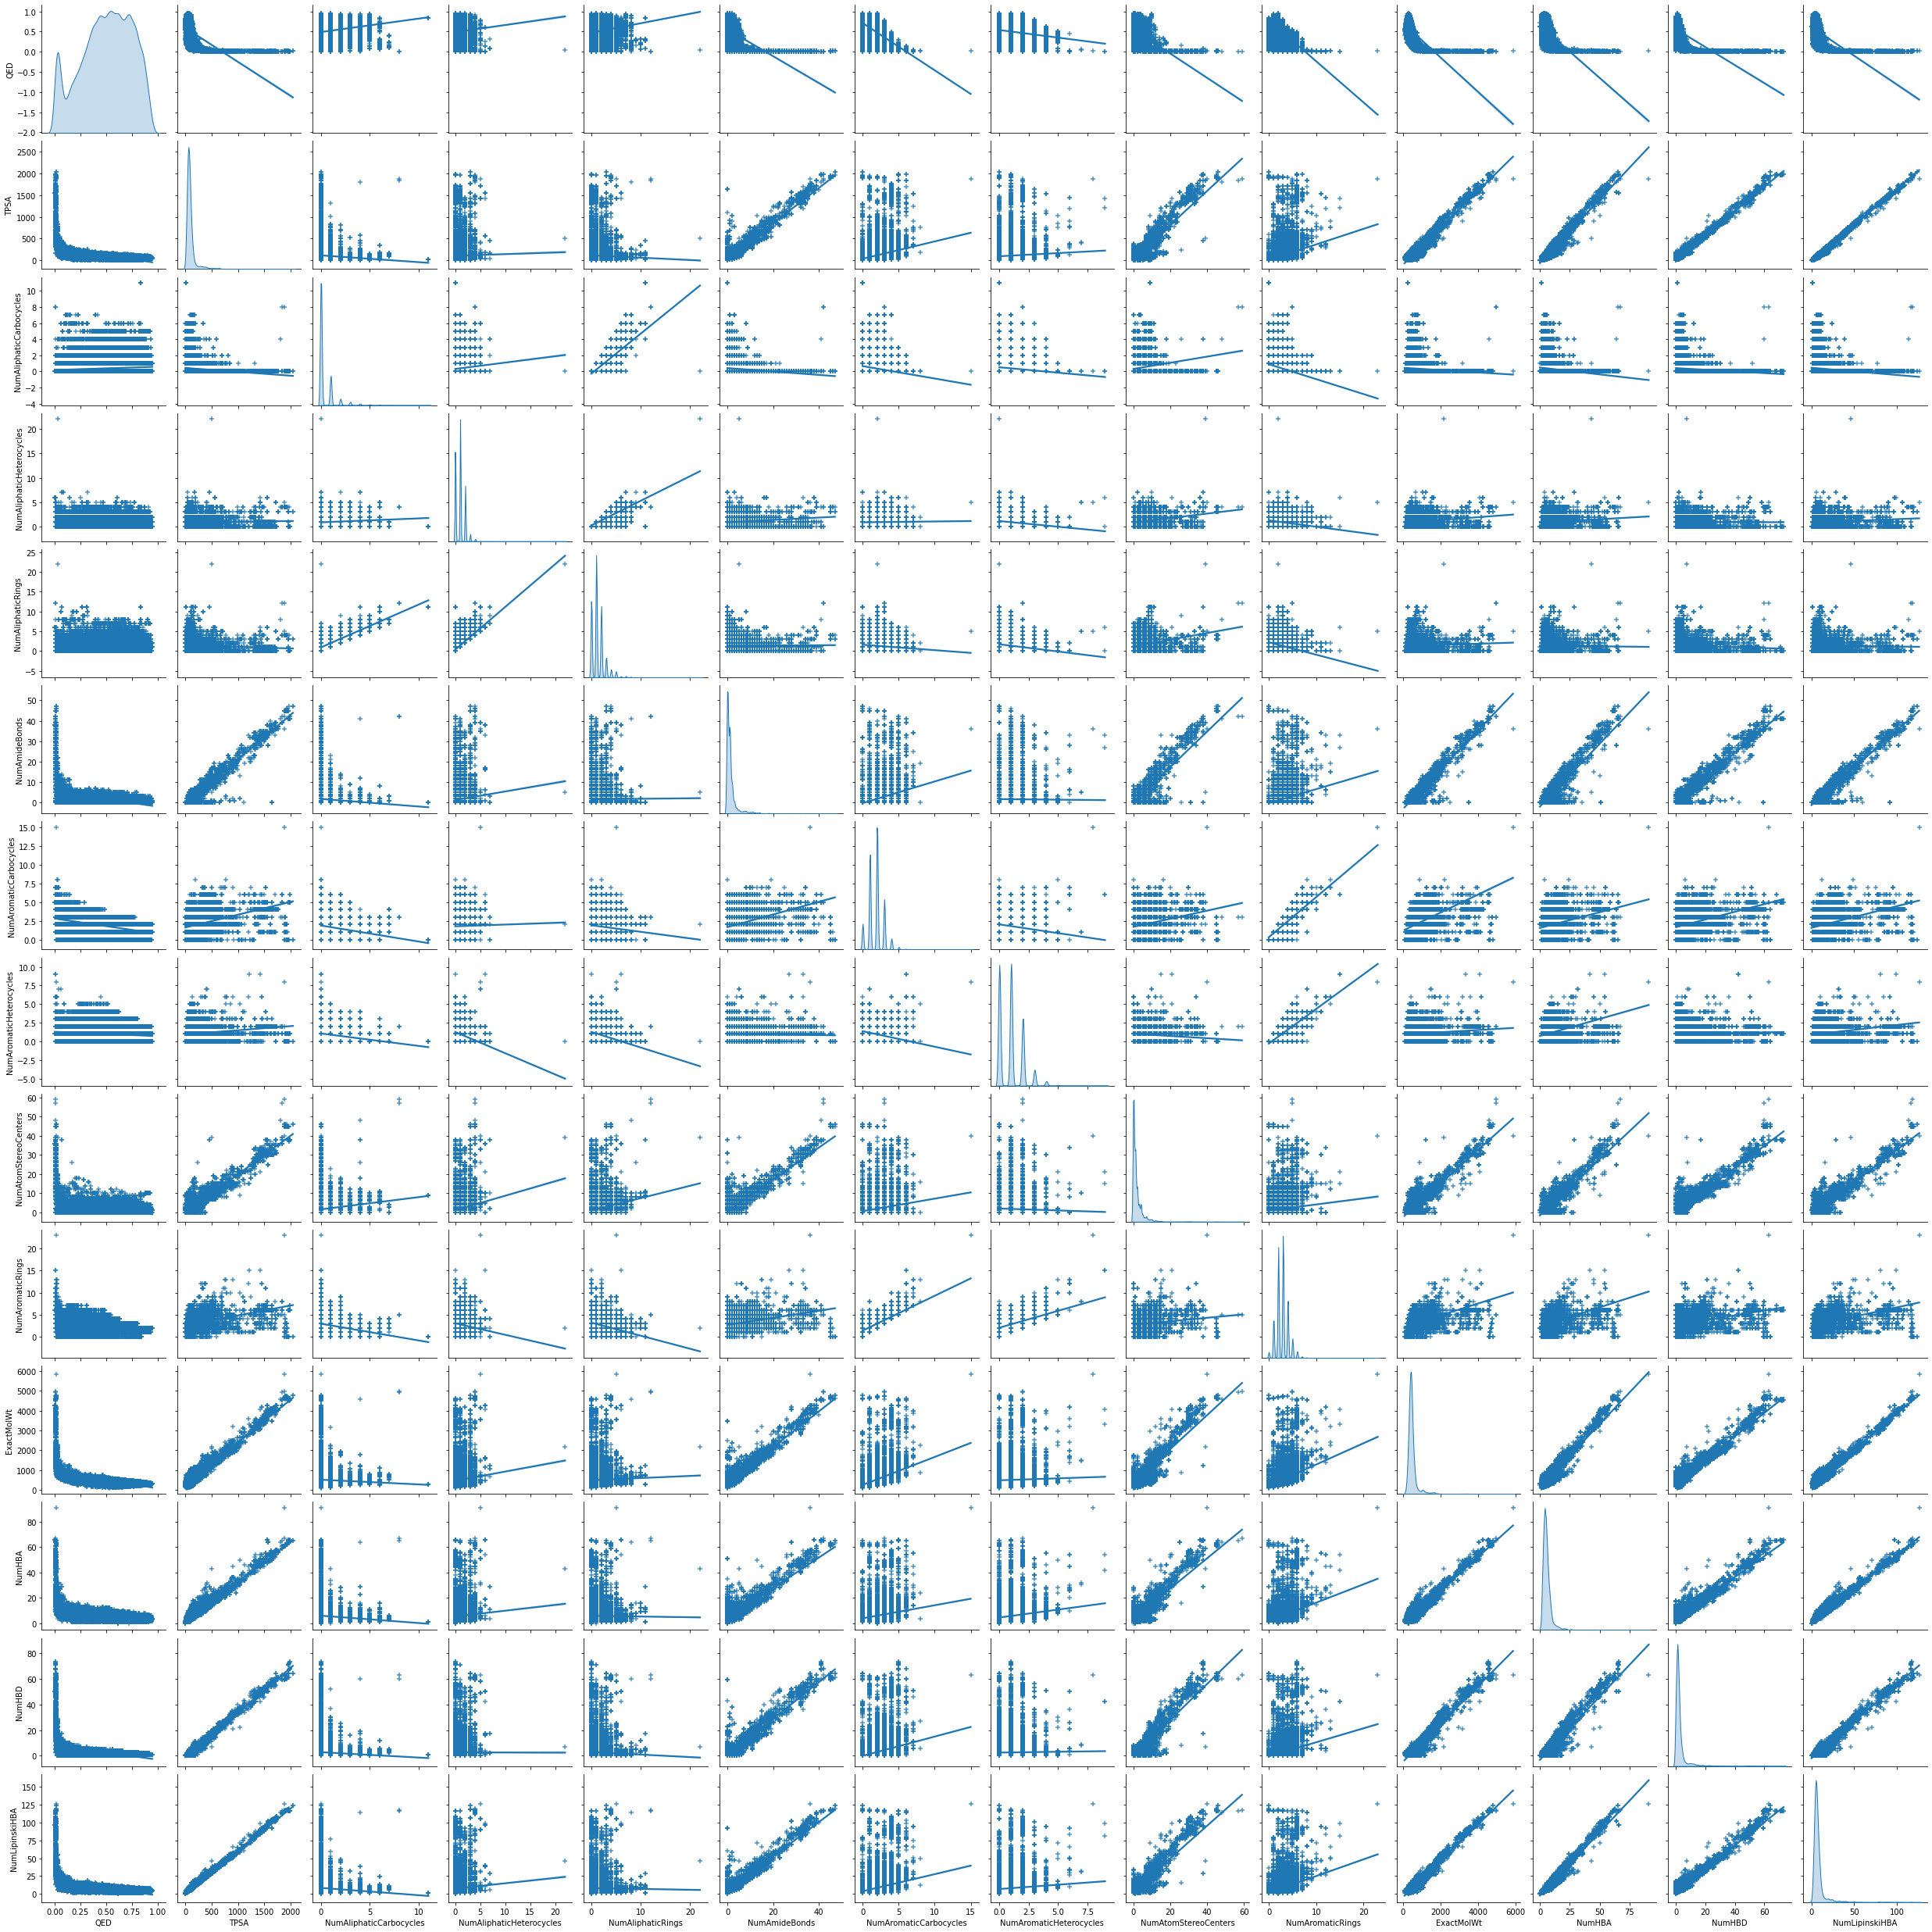

In [11]:
sns.pairplot(all_df[['QED', 'TPSA', 'NumAliphaticCarbocycles',
                                      'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAmideBonds',
                                      'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAtomStereoCenters', 'NumAromaticRings', 
                                      'ExactMolWt', 'NumHBA', 'NumHBD', 'NumLipinskiHBA']], diag_kind='kde', kind='reg', markers='+')
plt.show()

In [12]:
from rdkit.Chem import rdMolDescriptors
#from rdkit.Chem.Draw import IPythonConsol



bi = {}
radius = 2 # How far from the center node should we look at? 
#ecfp_power = 10 # Size of the fingerprint vectors  
all_df['Morgan'] = [rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius, bitInfo=bi)for mol in all_df['Molecule'] ]


,GPCR Name,Ligand Name,Molecule,Parameter,Value,Molecular Formula,Molecular Weight,XlogP,Hydrogen Bond Donors,Hydrogen Bond Acceptors,...,NumAmideBonds,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAtomStereoCenters,NumAromaticRings,ExactMolWt,NumHBA,NumHBD,NumLipinskiHBA,Morgan
0,Nociceptin receptor,CHEMBL391486,,Ki,3,C28H38N4O4,494.636,4.2,1.0,5.0,...,1.0,2.0,1.0,1.0,3.0,494.289306,7.0,1.0,8.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Nociceptin receptor,CHEMBL391486,,IC50,32,C28H38N4O4,494.636,4.2,1.0,5.0,...,1.0,2.0,1.0,1.0,3.0,494.289306,7.0,1.0,8.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Nociceptin receptor,CHEMBL422641,,Ki,82.4,C24H22N4O2,398.466,3.5,3.0,5.0,...,1.0,3.0,1.0,0.0,4.0,398.174276,5.0,3.0,6.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Nociceptin receptor,CHEMBL557925,,IC50,12,C19H22F3N3O,365.400,3.0,1.0,6.0,...,0.0,1.0,1.0,2.0,2.0,365.171497,4.0,1.0,4.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
4,Nociceptin receptor,CHEMBL399393,,Ki,155,C32H46N4O4,550.744,5.6,1.0,5.0,...,1.0,2.0,1.0,1.0,3.0,550.351906,7.0,1.0,8.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

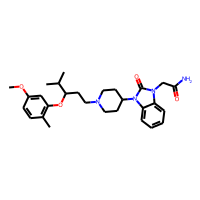
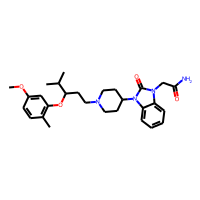
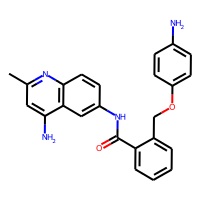
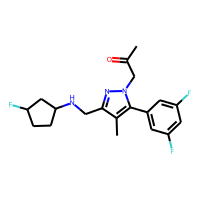
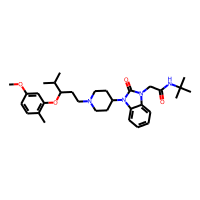

In [13]:
all_df.head(5)

In [14]:
#all_df = all_df.drop(['Canonical SMILES'],axis=1)
list(all_df .keys())

['GPCR Name',
 'Ligand Name',
 'Molecule',
 'Parameter',
 'Value',
 'Molecular Formula',
 'Molecular Weight',
 'XlogP',
 'Hydrogen Bond Donors',
 'Hydrogen Bond Acceptors',
 'Gene Name',
 'Species',
 'QED',
 'TPSA',
 'NumAliphaticCarbocycles',
 'NumAliphaticHeterocycles',
 'NumAliphaticRings',
 'NumAmideBonds',
 'NumAromaticCarbocycles',
 'NumAromaticHeterocycles',
 'NumAtomStereoCenters',
 'NumAromaticRings',
 'ExactMolWt',
 'NumHBA',
 'NumHBD',
 'NumLipinskiHBA',
 'Morgan']

In [15]:
train_dataset= all_df.drop(['Molecular Formula','Ligand Name', 'Molecule', 'GPCR Name', 'Parameter', 'Morgan','Value', 'Gene Name','Species', 'Hydrogen Bond Donors','Hydrogen Bond Acceptors'],axis=1)

In [16]:

#Why the HBA, ad HBD is different from the rdkit descriptors
train_dataset


,Molecular Weight,XlogP,QED,TPSA,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAmideBonds,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAtomStereoCenters,NumAromaticRings,ExactMolWt,NumHBA,NumHBD,NumLipinskiHBA
0,494.636,4.2,0.463684,91.72,0.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,494.289306,7.0,1.0,8.0
1,494.636,4.2,0.463684,91.72,0.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,494.289306,7.0,1.0,8.0
2,398.466,3.5,0.428352,103.26,0.0,0.0,0.0,1.0,3.0,1.0,0.0,4.0,398.174276,5.0,3.0,6.0
3,365.400,3.0,0.849013,46.92,1.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0,365.171497,4.0,1.0,4.0
4,550.744,5.6,0.377146,77.73,0.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,550.351906,7.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92475,320.473,5.2,0.263028,57.53,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,320.235145,2.0,2.0,3.0
92476,555.625,3.6,0.307579,109.12,0.0,2.0,2.0,0.0,2.0,1.0,2.0,3.0,555.195168,8.0,0.0,10.0
92477,555.625,3.6,0.307579,109.12,0.0,2.0,2.0,0.0,2.0,1.0,2.0,3.0,555.195168,8.0,0.0,10.0
92478,87.166,1.0,0.533729,26.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.104799,1.0,1.0,1.0


In [17]:
# Target is the values we wish to predict.
# pull them out of the DF
target_col = 'Molecular Weight'
dropcol = ['Molecular Weight']


def targets_features(df, target, drops):
    '''Take in a data frame, the target column name, and list of columns to be dropped
    returns a numpy array with the target variable,
    a numpy array (matrix) of feature variables,
    and a list of strings of the feature headers.'''
    
    #make array of target values
    target = np.array(df[target])
    
    
    #remove target from features
    #axis 1 is the columns.  
    features = df.drop(drops, axis = 1)
    
    #save list of strings of features
    feature_list = list(features.columns)
    
    #convert features to numpy
    featuresarr = np.array(features)
    return target, featuresarr, feature_list

    
target, features, feature_list = targets_features(train_dataset, target_col, dropcol)
print('The features are:')
print(feature_list)

The features are:
['XlogP', 'QED', 'TPSA', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAmideBonds', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAtomStereoCenters', 'NumAromaticRings', 'ExactMolWt', 'NumHBA', 'NumHBD', 'NumLipinskiHBA']


In [18]:
#Import Scikit-Learn
from sklearn.model_selection import train_test_split
# split the data into training and test
test_percent = 0.2
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size = test_percent, random_state = 42) #what data to split and how to do it.
#test size is the training set percentage in decimal form. 
print('Training Features Shape:' , train_features.shape)
print('Training Target Shape:' , train_target.shape)
print('Test Features Shape:' , test_features.shape)
print('Test Target Shape:' , test_target.shape)

Training Features Shape: (73984, 15)
Training Target Shape: (73984,)
Test Features Shape: (18496, 15)
Test Target Shape: (18496,)


In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor 
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 300, num = 3)]

# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
max_features = [ 'sqrt']
# test sqrt
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(50, 250, num = 11)]
max_depth = [int(x) for x in np.linspace(50, 250, num = 1)]
max_depth.append(None)

# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
min_samples_split = [5]
#est = 5
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
min_samples_leaf = [3]

# test min=3
# Method of selecting samples for training each tree
#bootstrap = [True, False]
bootstrap = [True]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 250, 300], 'max_features': ['sqrt'], 'max_depth': [50, None], 'min_samples_split': [5], 'min_samples_leaf': [3], 'bootstrap': [True]}


In [20]:
def hyperTune(train_features, test_features, train_target, test_target, grid, folds, iters):
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    rf = RandomForestRegressor()
    
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = grid, n_iter = iters, cv = folds, verbose=3, random_state=42, n_jobs = -1)

    # Fit the random search model
    rf_random.fit(train_features, train_target)
    tuned = rf_random.best_params_
    
    return tuned

opt_params = hyperTune(train_features, test_features, train_target, test_target, random_grid, 3, 50)

print(opt_params)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/home/l017896/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=50. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


In [21]:
exp = 'SAR_num_rf'
from sklearn.ensemble import RandomForestRegressor # get the model

def trainResults(params, train_features, test_features, train_target, test_target):
    """Do the stuff."""
    #target, features
    
    # set up the model
    rf = RandomForestRegressor(n_estimators = params['n_estimators'], max_features = params['max_features'],
                           max_depth = params['max_depth'], min_samples_split = params['min_samples_split'],
                           bootstrap = params['bootstrap'], min_samples_leaf = params['min_samples_leaf'],
                           random_state = 25)
    
   
    #train the model!
    rf.fit(train_features, train_target)
    
    #Make predictions
    predictions = rf.predict(test_features) # test predictions
    errors = abs(predictions - test_target)

    
    # Get numerical feature importances
    importances2 = rf.feature_importances_ # used later for graph

    # List of features with variable and importance
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, list(importances2))]

    # Sort the feature importances by most important first
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    # Print out the feature and importances 
#     [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
    
    #prepare importance data for export and graphing
    indicies = (-importances2).argsort()
    varimp = pd.DataFrame([], columns = ['variable', 'importance'])
    varimp['variable'] = [feature_list[i] for i in indicies]
    varimp['importance'] = importances2[indicies]
    varimp.to_csv(exp+'-varimp.csv')
    
    #predictions
    pva = pd.DataFrame([], columns =['actual', 'predicted'])
    pva['actual'] = test_target
    pva['predicted'] = predictions
    # print(pva)
    pva.to_csv(exp+'-pva_data_jan11.csv')
    
    return varimp, feature_importances, pva
    

importances, impdict, predictions = trainResults(opt_params, train_features, test_features, train_target, test_target)

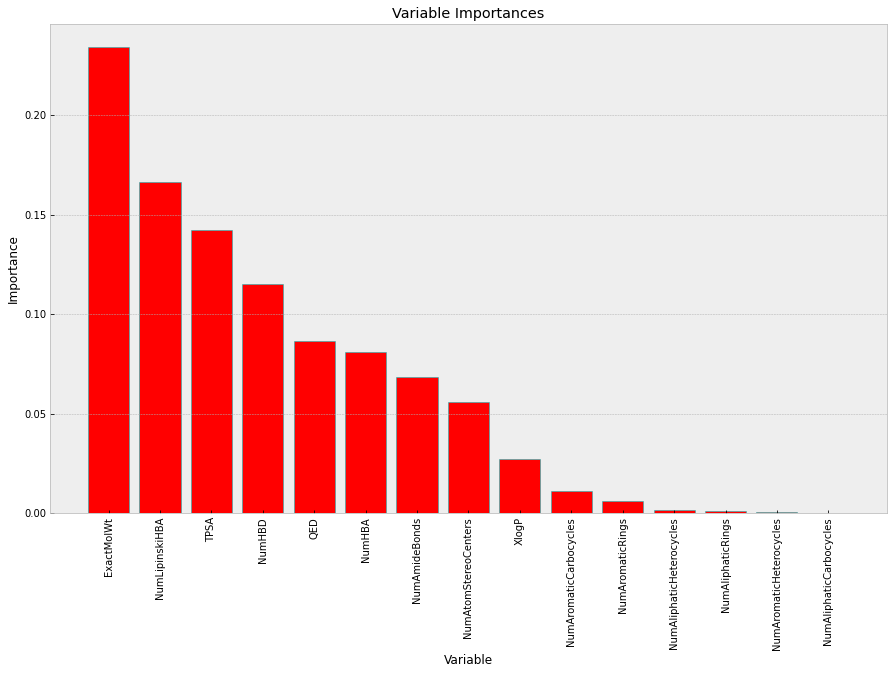

In [22]:
import matplotlib.pyplot as plt

def imp_graph(imp):
    """Give it the importances and predicted vs actual data frames."""
    
    #Importance Bar Graph
    plt.rcParams['figure.figsize'] = [15,9]
    
    # Set the style
    plt.style.use('bmh')
    
#     # list of x locations for plotting
#     x_values = list(range(importances.shape[0]))
    
    # intiate plot (mwahaha)
    fig, ax = plt.subplots()
    plt.bar(imp.index, imp['importance'], orientation = 'vertical', color="r", edgecolor='c')

    # Tick labels for x axis
    # plt.xticks(x_values, feature_list, rotation='vertical')
    plt.xticks(imp.index, imp['variable'], rotation='vertical')

    # Axis labels and title
    plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

    # ax = plt.axes()
    ax.xaxis.grid(False) #remove just xaxis grid

    plt.savefig(exp+'-logP-importance.png')

imp_graph(importances)

/node/scratch/88246194.1.all.normal.q/ipykernel_58440/1214904208.py:1: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.anchored_artists import AnchoredText


R^2 = 0.999
MSE = 57.939
RMSE = 7.612


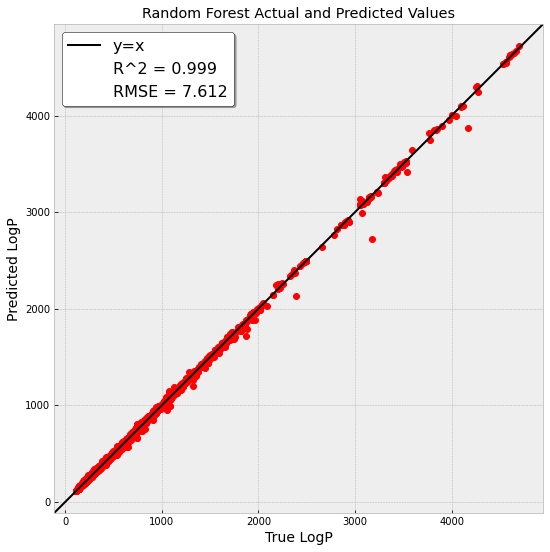

[CV 3/3] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.999 total time=  11.7s
[CV 2/3] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=250;, score=0.999 total time=  14.5s
[CV 3/3] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=300;, score=0.999 total time=  17.5s
[CV 3/3] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=250;, score=0.999 total time=  15.1s
[CV 1/3] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=250;, score=0.999 total time=  15.2s
[CV 2/3] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=300;, score=0.999 total time=  18.2s
[CV 3/3] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf

In [23]:
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

def pva_graph(pva):
    r2 = r2_score(pva['actual'],pva['predicted'])
    mse = mean_squared_error(pva['actual'],pva['predicted'])
    rmse = np.sqrt(mean_squared_error(pva['actual'],pva['predicted']))
    print('R^2 = %.3f' % r2)
    print('MSE = %.3f' % mse)
    print('RMSE = %.3f' % rmse)


    fig, ax = plt.subplots()
    plt.plot(pva['actual'],pva['predicted'], 'ro')
    # ax = plt.axes()
    plt.xlabel('True LogP', fontsize = 14); plt.ylabel('Predicted LogP', fontsize = 14); plt.title('Random Forest Actual and Predicted Values')
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]),
            np.max([ax.get_xlim(), ax.get_ylim()])
           ]
    plt.plot(lims, lims, 'k-', label = 'y=x')
    plt.plot([], [], ' ', label='R^2 = %.3f' % r2)
    plt.plot([], [], ' ', label='RMSE = %.3f' % rmse)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    # plt.axis([-2,5,-2,5]) #[-2,5,-2,5]
    ax.legend( prop = {'size': 16} , facecolor ='w', edgecolor = 'k', shadow = True)

    plt.savefig(exp+'-logP-PvA.png')
    plt.show()
    
    return r2, mse, rmse

r2, mse, rmse = pva_graph(predictions)